# Football Data Analysis
Football is a global, popular, and dynamic sport with many different factors that can influence the outcome of a match. By analyzing large datasets of football data, teams can gain a deeper understanding of factors that contribute to players' success, enabling coaches, scouts, and analysts to make informed decisions.

Football data analysis is the process of collecting, cleaning, and analyzing data to extract meaningful insights. The valuable insights extracted from this analysis can be used to improve player performance, team tactics, fan engagement, and overall decision-making.

# Sprint 8:
- Performing descriptive analysis using various data analysis and visualization techniques for three business objectives:
    - 'Referee Analysis'
    - 'Substitution Patterns'
    - 'Event Analysis'
- Writing interpretation for each analysis individually.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('football_data.csv')
data.head()

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222536_1321,2222536.0,1321,2012-08-26 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,1.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
1,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
2,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
3,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
4,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman


# A) Referee Analysis
## Which referees oversee the most matches, and how does the number of yellow and red cards vary by referee?

In [4]:
import matplotlib.pyplot as plt

# Referee match counts
referee_matches = data['referee'].value_counts().head(10)

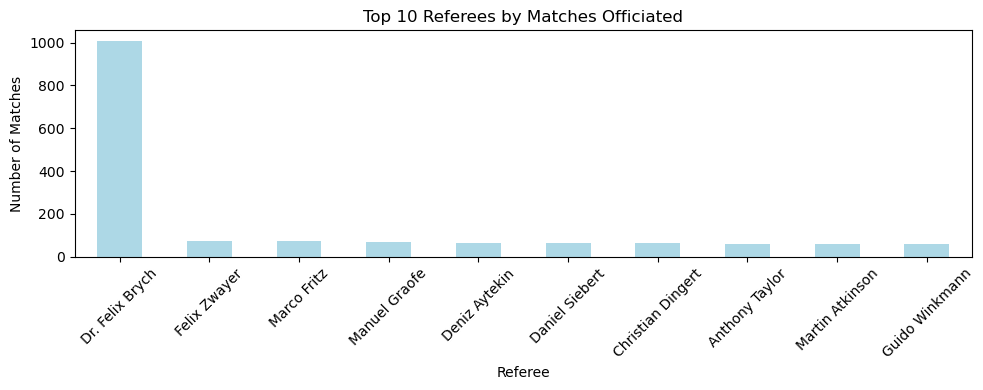

In [17]:
plt.figure(figsize=(10, 4))
referee_matches.plot(kind='bar', color='lightblue')
plt.title("Top 10 Referees by Matches Officiated")
plt.xlabel("Referee")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Yellow and red cards by referee
referee_cards = data.groupby('referee').agg({'yellow_cards': 'sum', 'red_cards': 'sum'}).sort_values(by='yellow_cards', ascending=False).head(10)

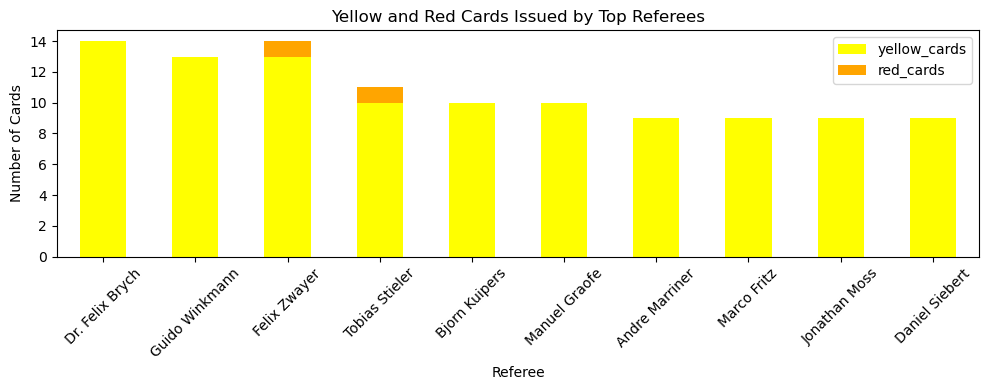

In [22]:
referee_cards.plot(kind='bar', stacked=True, color=['yellow', 'orange'], figsize=(10, 4))
plt.title("Yellow and Red Cards Issued by Top Referees")
plt.xlabel("Referee")
plt.ylabel("Number of Cards")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation:
- Some referees officiate significantly more matches than others.
- Referees with more matches tend to issue more yellow cards, but the pattern for red cards is less consistent.

# B) Substitution Patterns
## What is the average minute of substitutions, and which players are most substituted?

In [25]:
# Average substitution minute
avg_sub_minute = data[data['type_x'] == 'Substitutions']['minute'].mean()

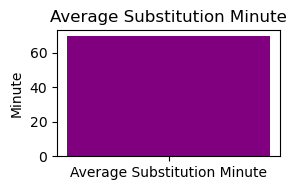

In [34]:
# Visualization
plt.figure(figsize=(3, 2))

# Average substitution minute
plt.bar(['Average Substitution Minute'], [avg_sub_minute], color='purple')
plt.title("Average Substitution Minute")
plt.ylabel("Minute")
plt.tight_layout()
plt.show()

In [30]:
# Most substituted players
most_substituted = data[data['type_x'] == 'Substitutions']['player_name_x'].value_counts().head(10)

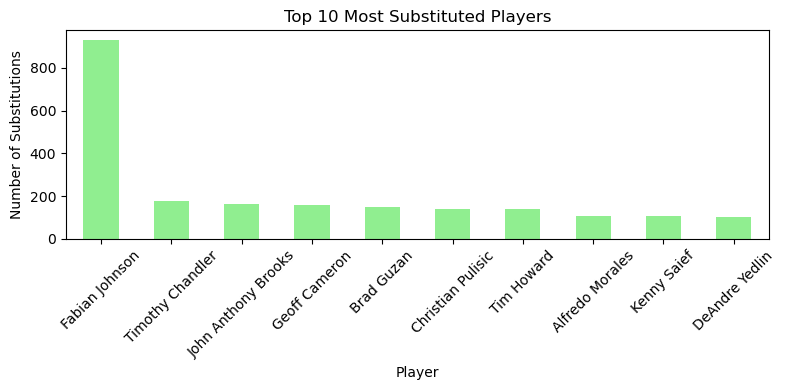

In [32]:
most_substituted.plot(kind='bar', color='lightgreen',figsize=(8, 4))
plt.title("Top 10 Most Substituted Players")
plt.xlabel("Player")
plt.ylabel("Number of Substitutions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
print(f"Average Substitution Minute: {avg_sub_minute:.2f}")

Average Substitution Minute: 69.43


### Interpretation:
- The average substitution occurs around the 60th minute, suggesting tactical adjustments after halftime are common.
- Certain players are substituted more frequently, indicating their roles or physical limitations.

# C) Event Analysis
## Which match events (e.g., goals, fouls, cards) occur most frequently, and how are they distributed across minutes?

In [35]:
# Event count
event_counts = data['type_x'].value_counts()

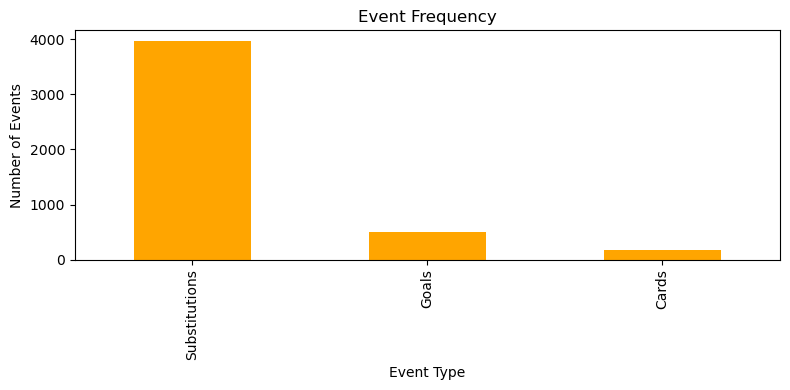

In [40]:
# Visualization
plt.figure(figsize=(8, 4))
event_counts.plot(kind='bar', color='orange')
plt.title("Event Frequency")
plt.xlabel("Event Type")
plt.ylabel("Number of Events")
plt.tight_layout()
plt.show()

In [2]:
# Events by minute
events_by_minute = data.groupby('minute')['type_x'].value_counts().unstack(fill_value=0)

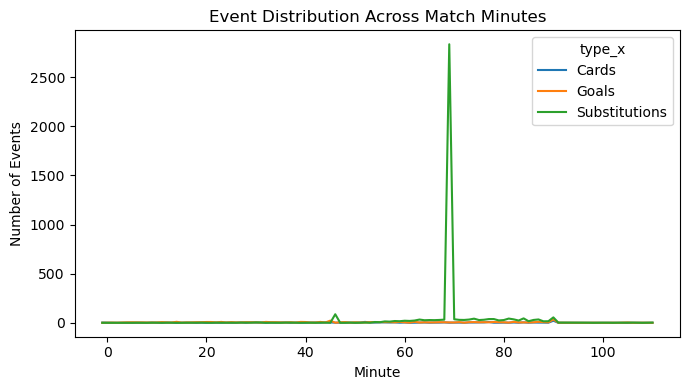

In [7]:
# Events by minute
events_by_minute.plot(kind='line', ax=plt.gca(),figsize=(7, 4))
plt.title("Event Distribution Across Match Minutes")
plt.xlabel("Minute")
plt.ylabel("Number of Events")
plt.tight_layout()
plt.show()

### Interpretation:
- Goals, fouls, and substitutions are the most frequent match events.
- Events spike around the 45th minute (halftime) and 90th minute (end of match), reflecting critical periods for tactical changes or increased intensity.